In [1]:
import logomaker as lm
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from keras.models import load_model
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [2]:
## load customized loss

def weighted_squared_error(y_true, y_pred):

    ltavg = y_true > 0

    mse = K.square(y_pred - y_true)
    weighted_mse = (1 + y_true) * K.square(y_pred - y_true)

    return K.mean(tf.where(ltavg, weighted_mse, mse))


losses = {
    "rl_output": weighted_squared_error,
    "decoded_output": 'categorical_crossentropy',
}

In [3]:
## load model
model = load_model('../models/Smart5UTR/Smart5UTR_egfp_m1pseudo2_Model.h5',compile=False)
scaler = joblib.load("../models/egfp_m1pseudo2.scaler")

model.compile(loss=losses,
                    metrics={'rl_output': 'mse', 'decoded_output': 'accuracy'})

In [4]:
# get first 1d conv layer
conv1 = model.layers[1]

fw, bw = conv1.get_weights()
print('filter weight matrix shape: ', fw.shape)
print("eg.", fw[:,:,0])


logos=[]

alph_letters = 'ACGU'
alph = list(alph_letters)


color_scheme = {
    'A' : "tomato",
    'U' : "gold",
    'G' : "skyblue",
    'C': 'lightgreen'
}

filter weight matrix shape:  (8, 4, 160)
eg. [[ 4.2317268e-02  1.8214634e-02  1.1569595e-02  1.9442476e-02]
 [ 4.5547350e-03  3.8657426e-03  6.6410184e-02  2.2366153e-02]
 [-4.6907235e-02  3.0634290e-02  1.2711148e-01 -1.7517997e-02]
 [-1.0724087e-02  2.5925796e-02  3.6767296e-02  5.9370190e-04]
 [-2.3049677e-02 -4.1773455e-04 -2.9495316e-02 -8.6814332e-05]
 [ 6.5377541e-02  3.8470211e-03 -2.4823409e-02  5.0095871e-02]
 [-2.9711729e-02  1.0291785e-02  1.1142730e-02 -1.3767423e-02]
 [ 1.4026867e-02 -3.5307373e-04  1.5259692e-02 -4.5892471e-03]]


In [11]:

def draw_filter_logo(rangel, ranger):
    fig, axs = plt.subplots(10, 4, figsize=(10.6, 15), dpi=300)
    fig.subplots_adjust(hspace=0.8, wspace=0.5)

    axs = axs.ravel()  ## to 1-d numpy array

    for filt_idx in range(rangel,ranger):
        if (filt_idx >= 40):
            ax_idx = filt_idx % 40
        else:
            ax_idx = filt_idx


        filt_weight_df = pd.DataFrame(fw[:, :, filt_idx], columns=alph)
        logo = lm.Logo(filt_weight_df, ax=axs[ax_idx], font_name='Arial', center_values=True, vpad=0,
                       color_scheme=color_scheme, show_spines=False, flip_below=True)

        baxis = axs[ax_idx].spines['bottom']
        laxis = axs[ax_idx].spines['left']
        baxis.set_visible(True)
        baxis.set_linewidth(0.5)
        # baxis.set_color('grey')
        laxis.set_visible(True)
        laxis.set_linewidth(0.5)
        # laxis.set_color('grey')

        axs[ax_idx].set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
        axs[ax_idx].set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8], fontsize=8,fontproperties = 'Arial')

        ylabels = axs[ax_idx].get_yticks()
        ytickmax = max(ylabels)
        ytickmin = min(ylabels)

        axs[ax_idx].set_yticks([-0.25, 0, 0.25])
        axs[ax_idx].tick_params(axis ='both', length=2, width=0.5, pad = 1, colors ='black')
        axs[ax_idx].set_yticklabels([-0.25, 0, 0.25], fontsize=8,fontproperties = 'Arial')

        axs[ax_idx].set_xlabel('Position', fontsize=8, labelpad=3,fontproperties = 'Arial')  ## show position and filter weight labels
        axs[ax_idx].set_ylabel('Filter Weight', fontsize=8, labelpad=3,fontproperties = 'Arial')
        axs[ax_idx].set_title('Filter ' + str(filt_idx + 1), fontsize=9,fontproperties = 'Arial')
        logos.append(logo)
    return fig


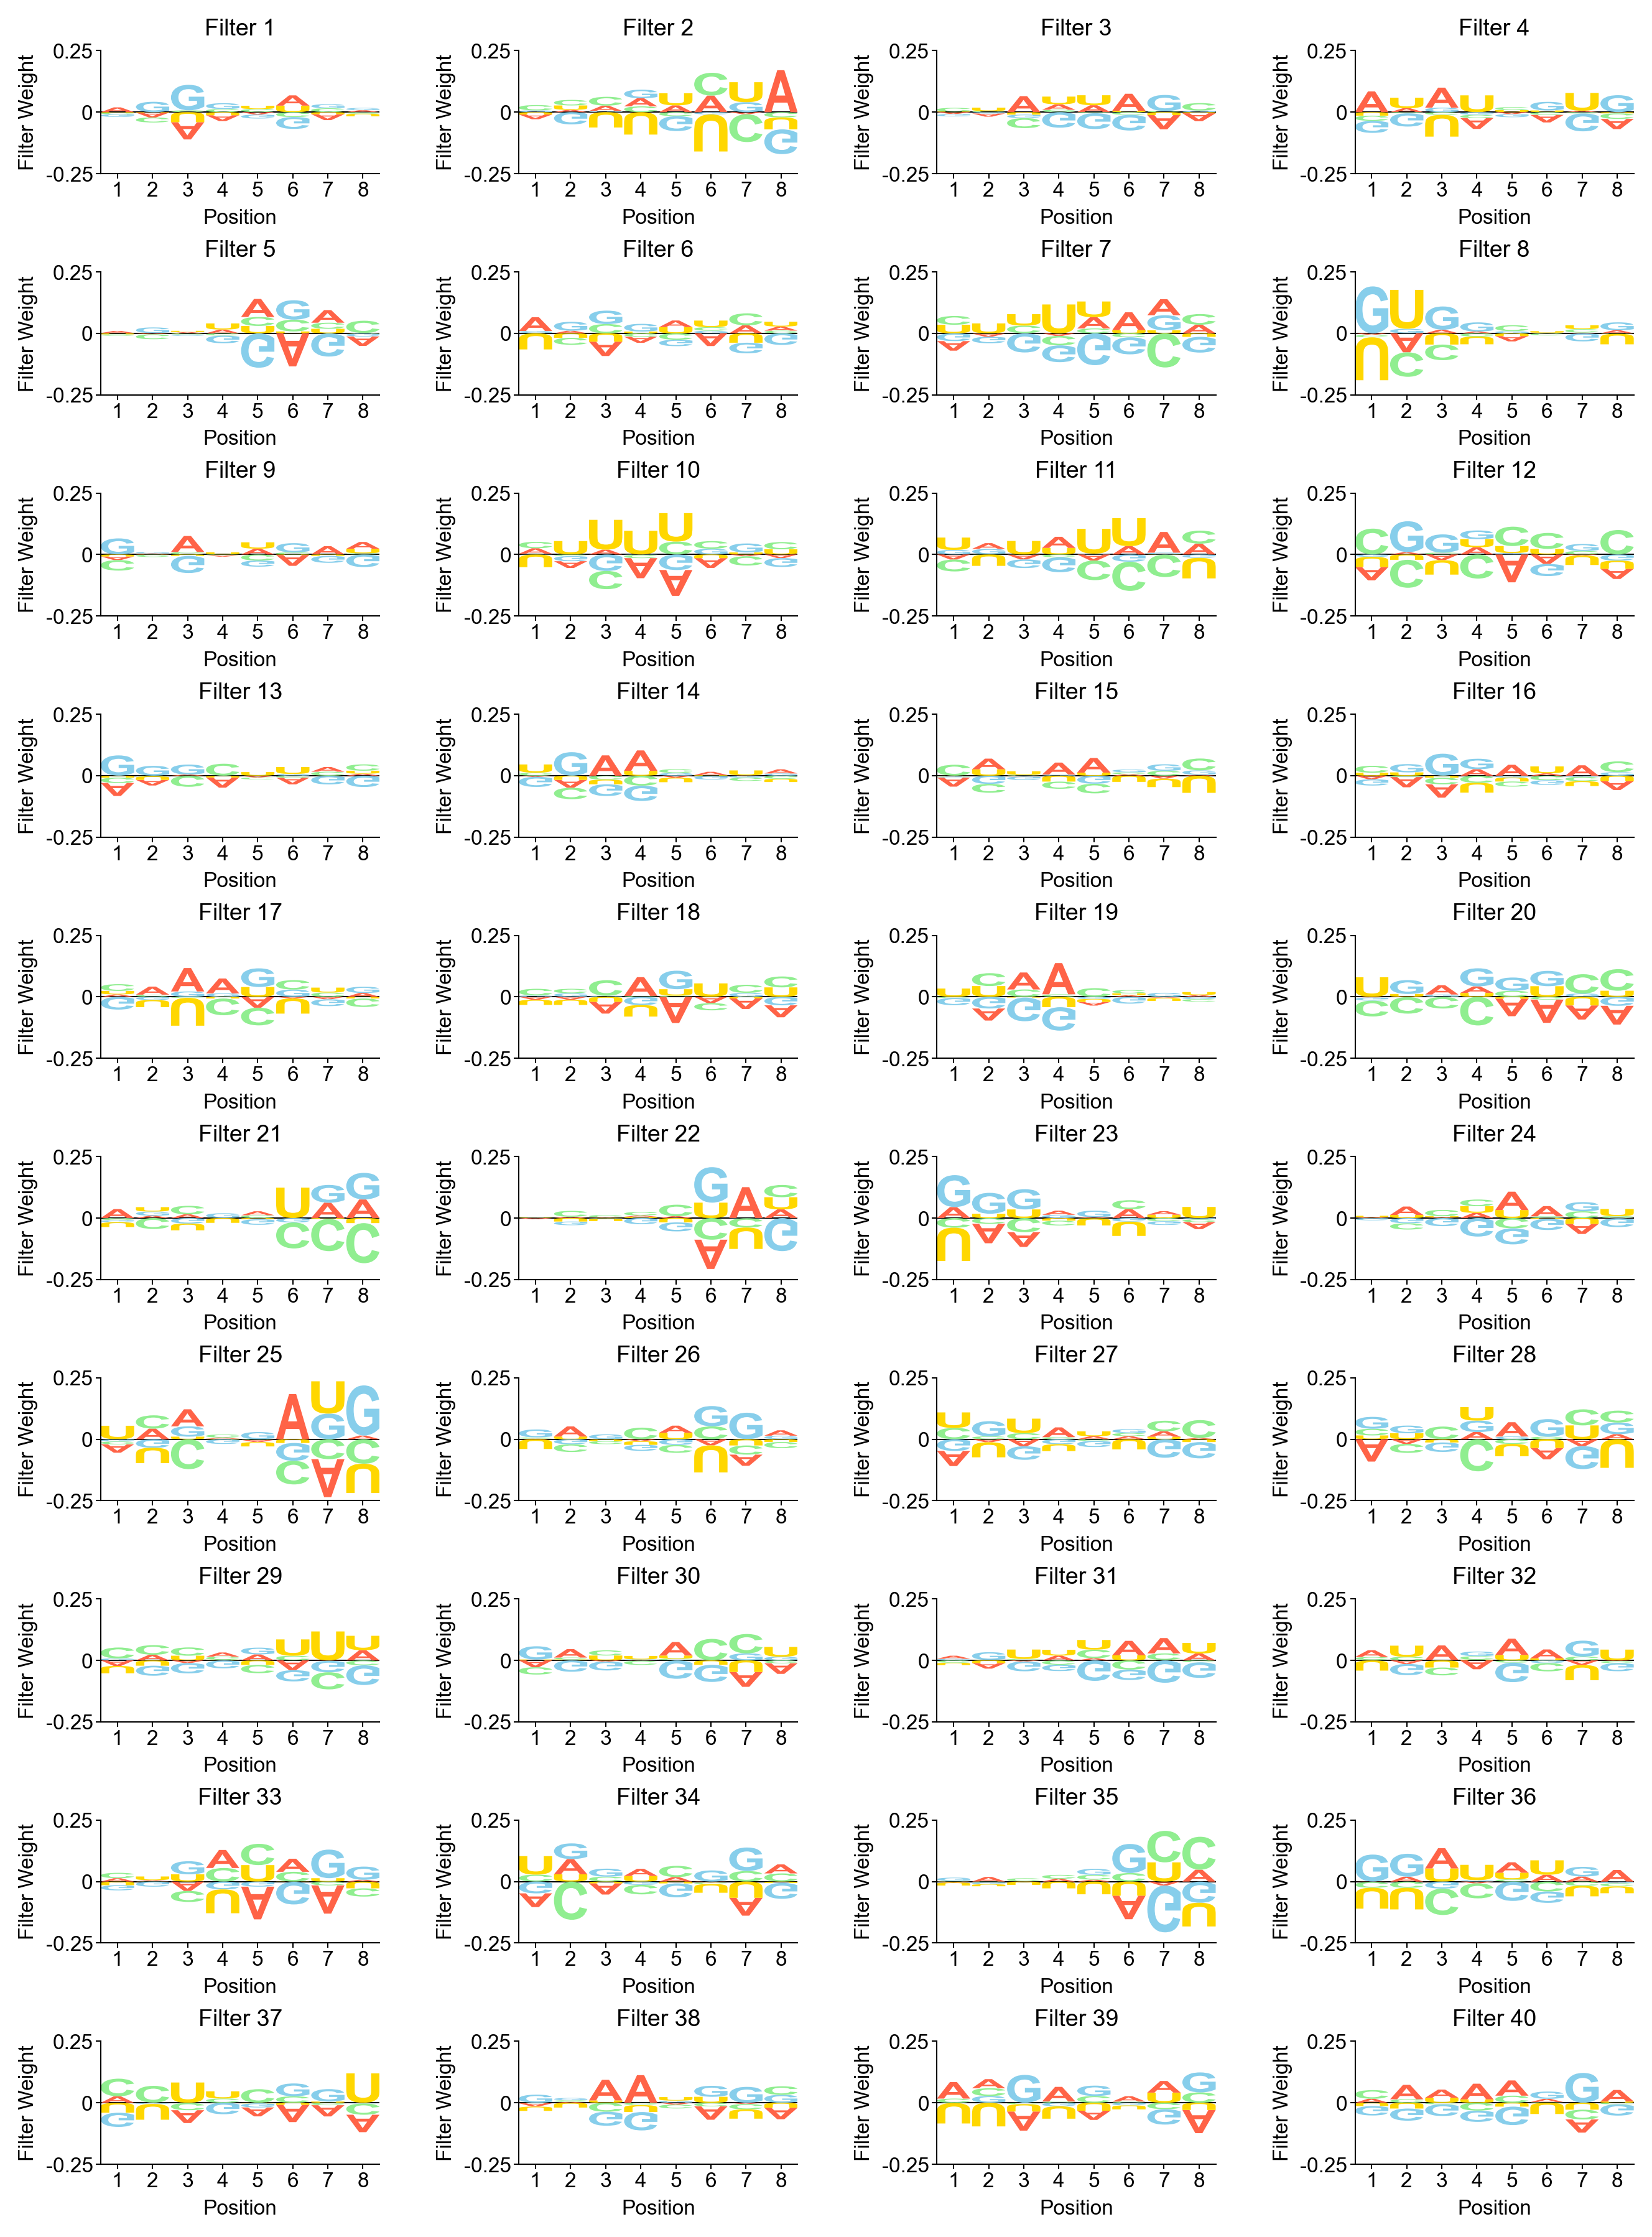

In [6]:
fig1 = draw_filter_logo(0, 40)

In [7]:
fig1.savefig('../figs/filterLogo1.png',dpi=300)

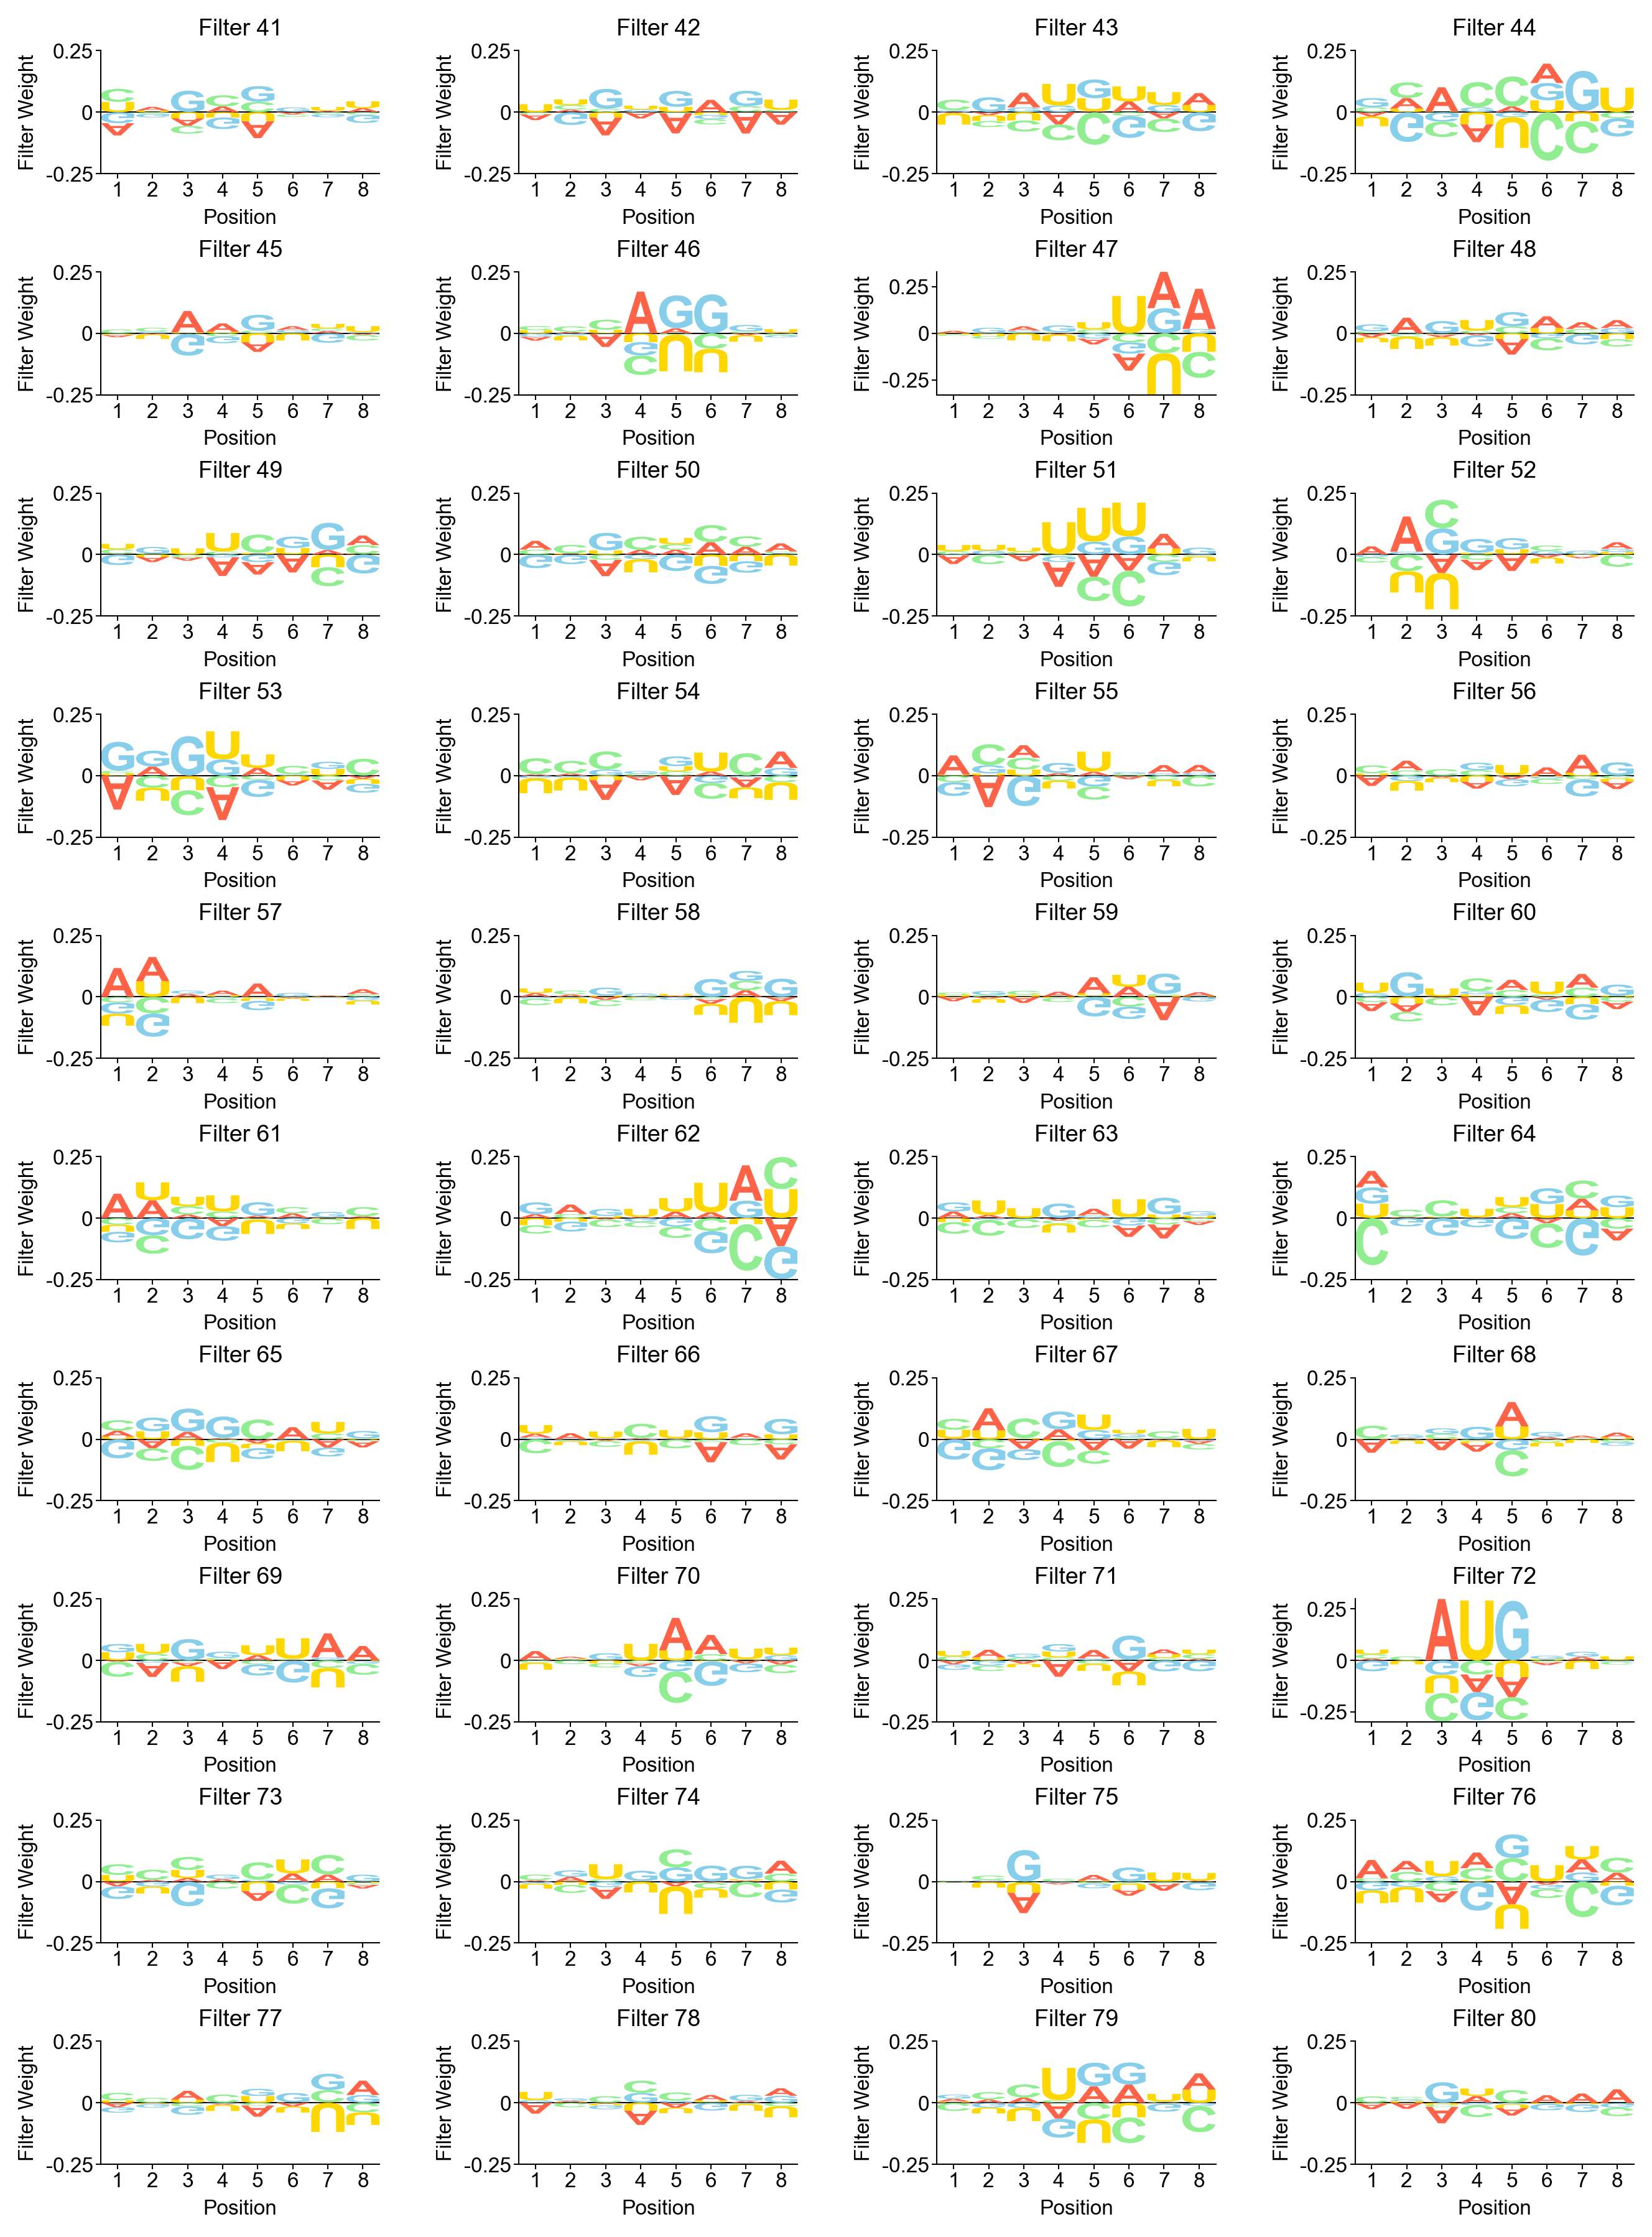

In [8]:
fig2 = draw_filter_logo(40, 80)
fig2.savefig('../figs/filterLogo2.png',dpi=300)

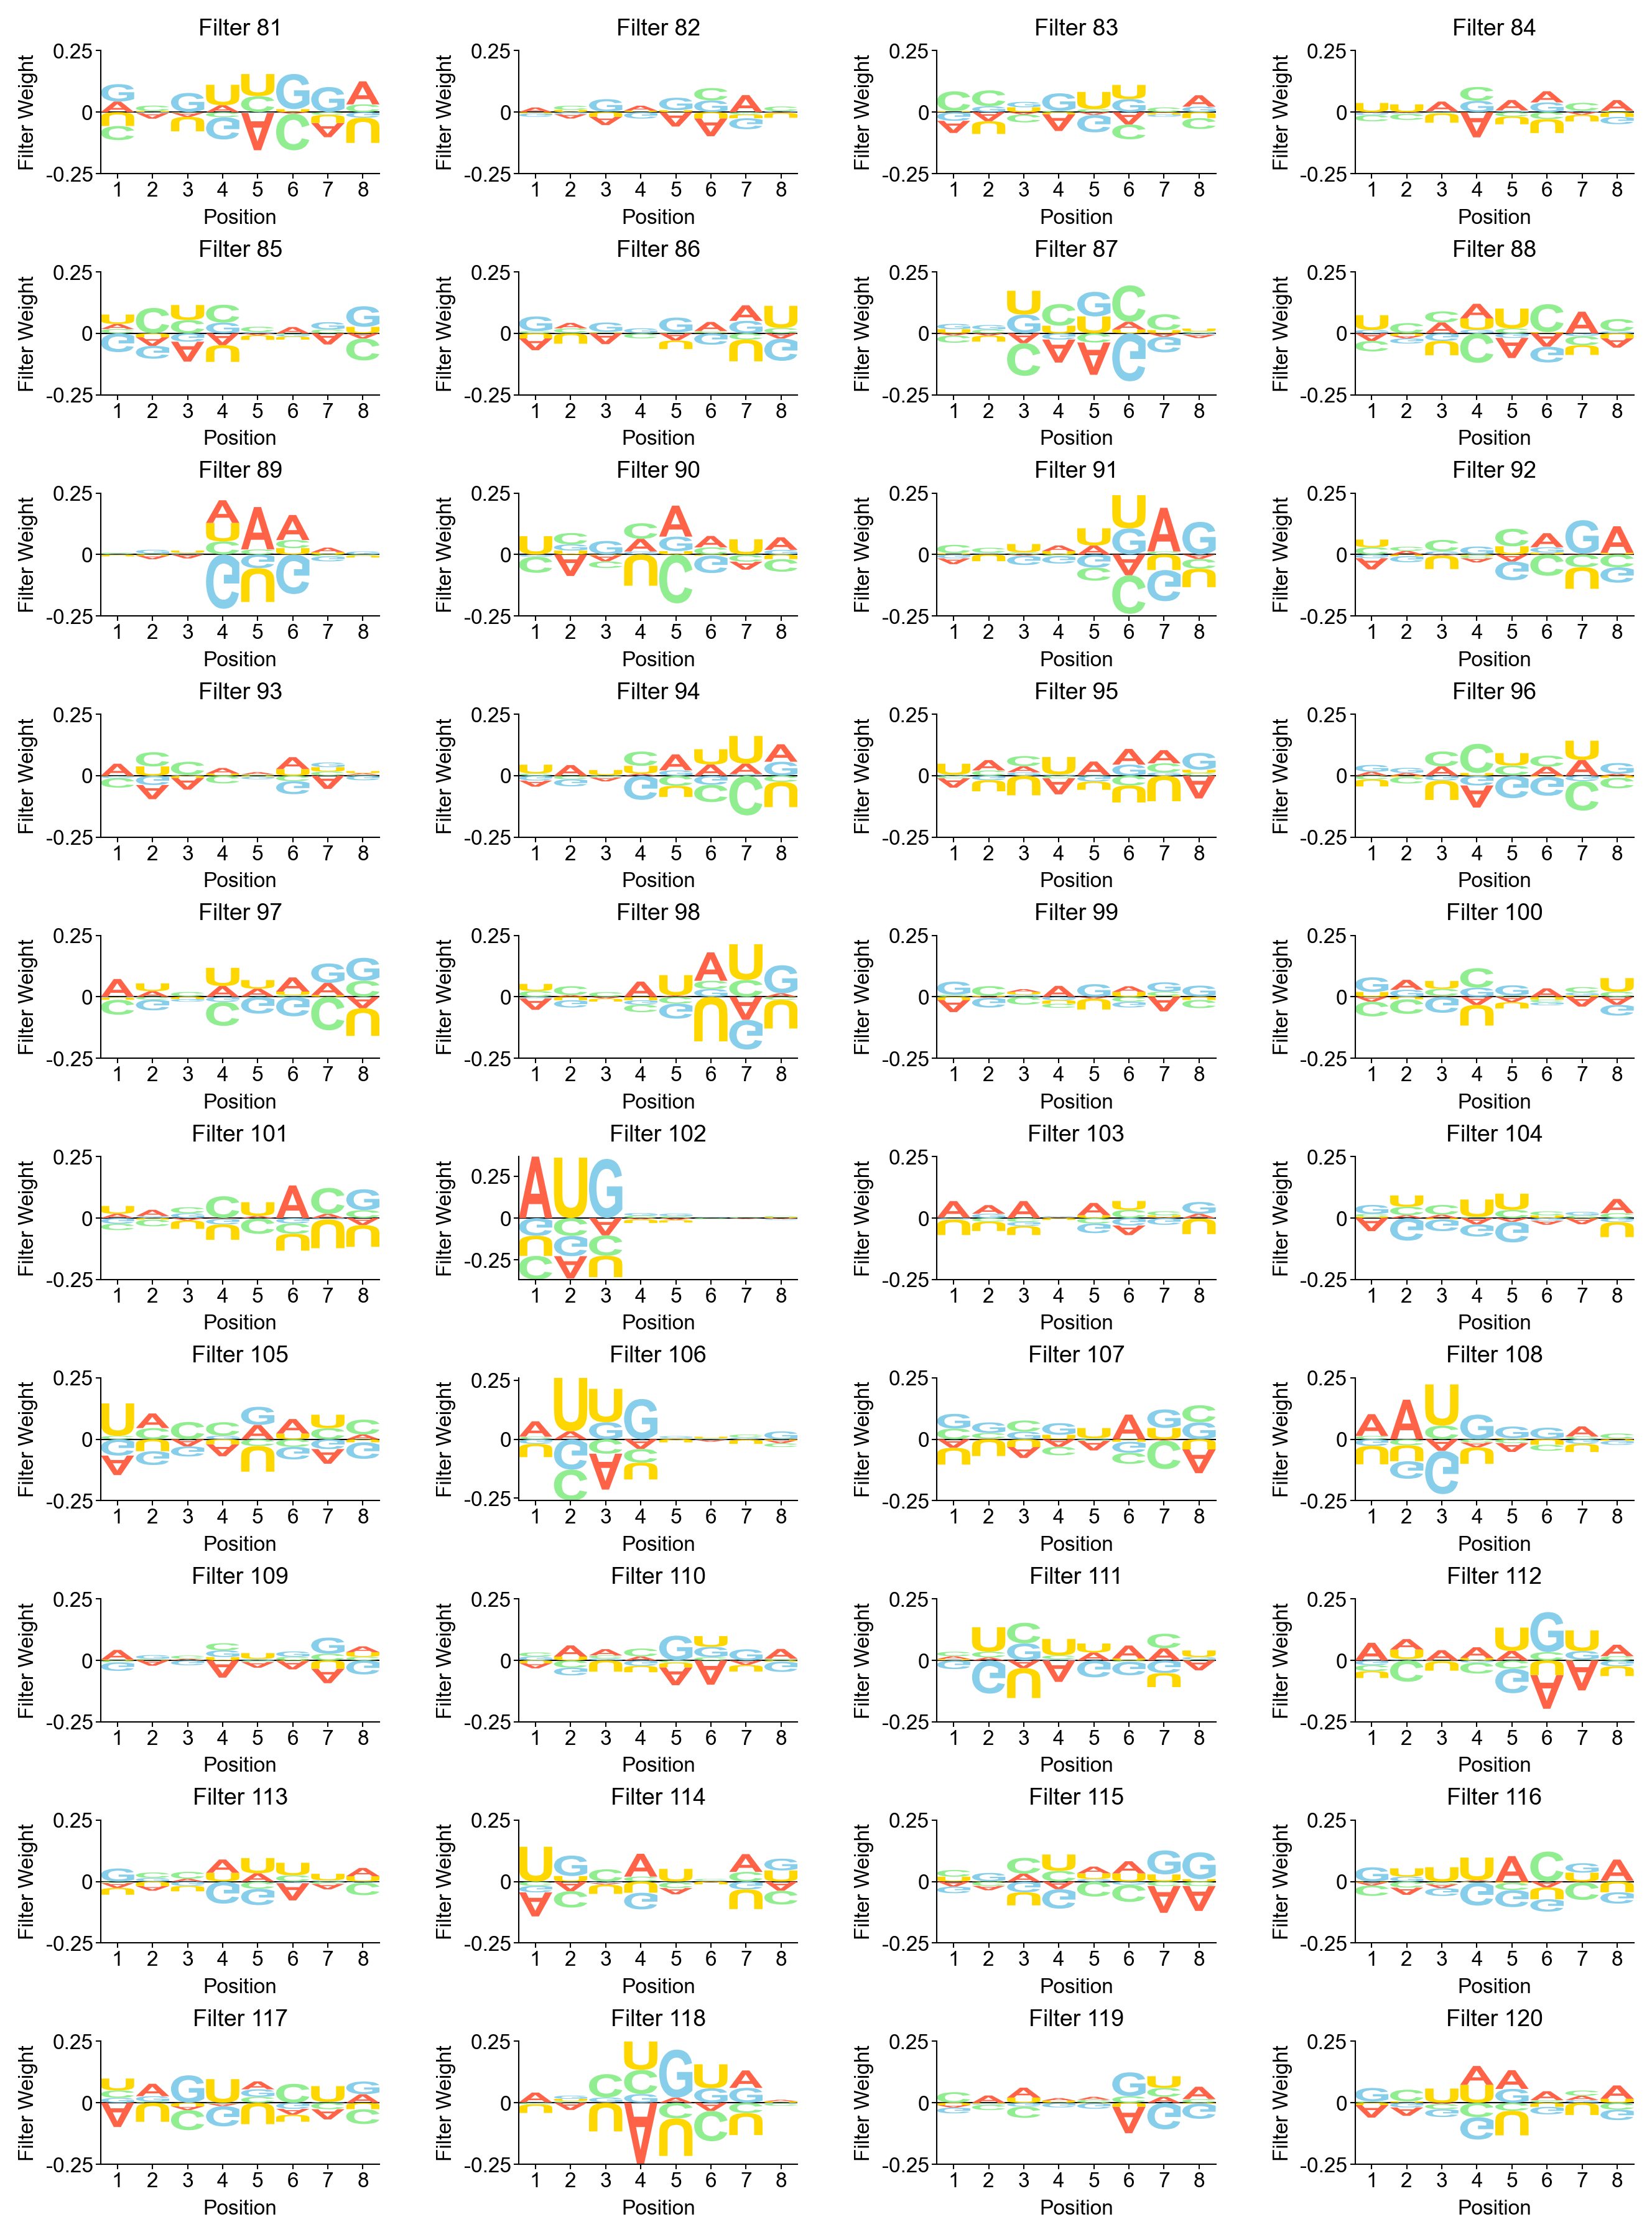

In [9]:
fig3 = draw_filter_logo(80, 120)
fig3.savefig('../figs/filterLogo3.png',dpi=300)

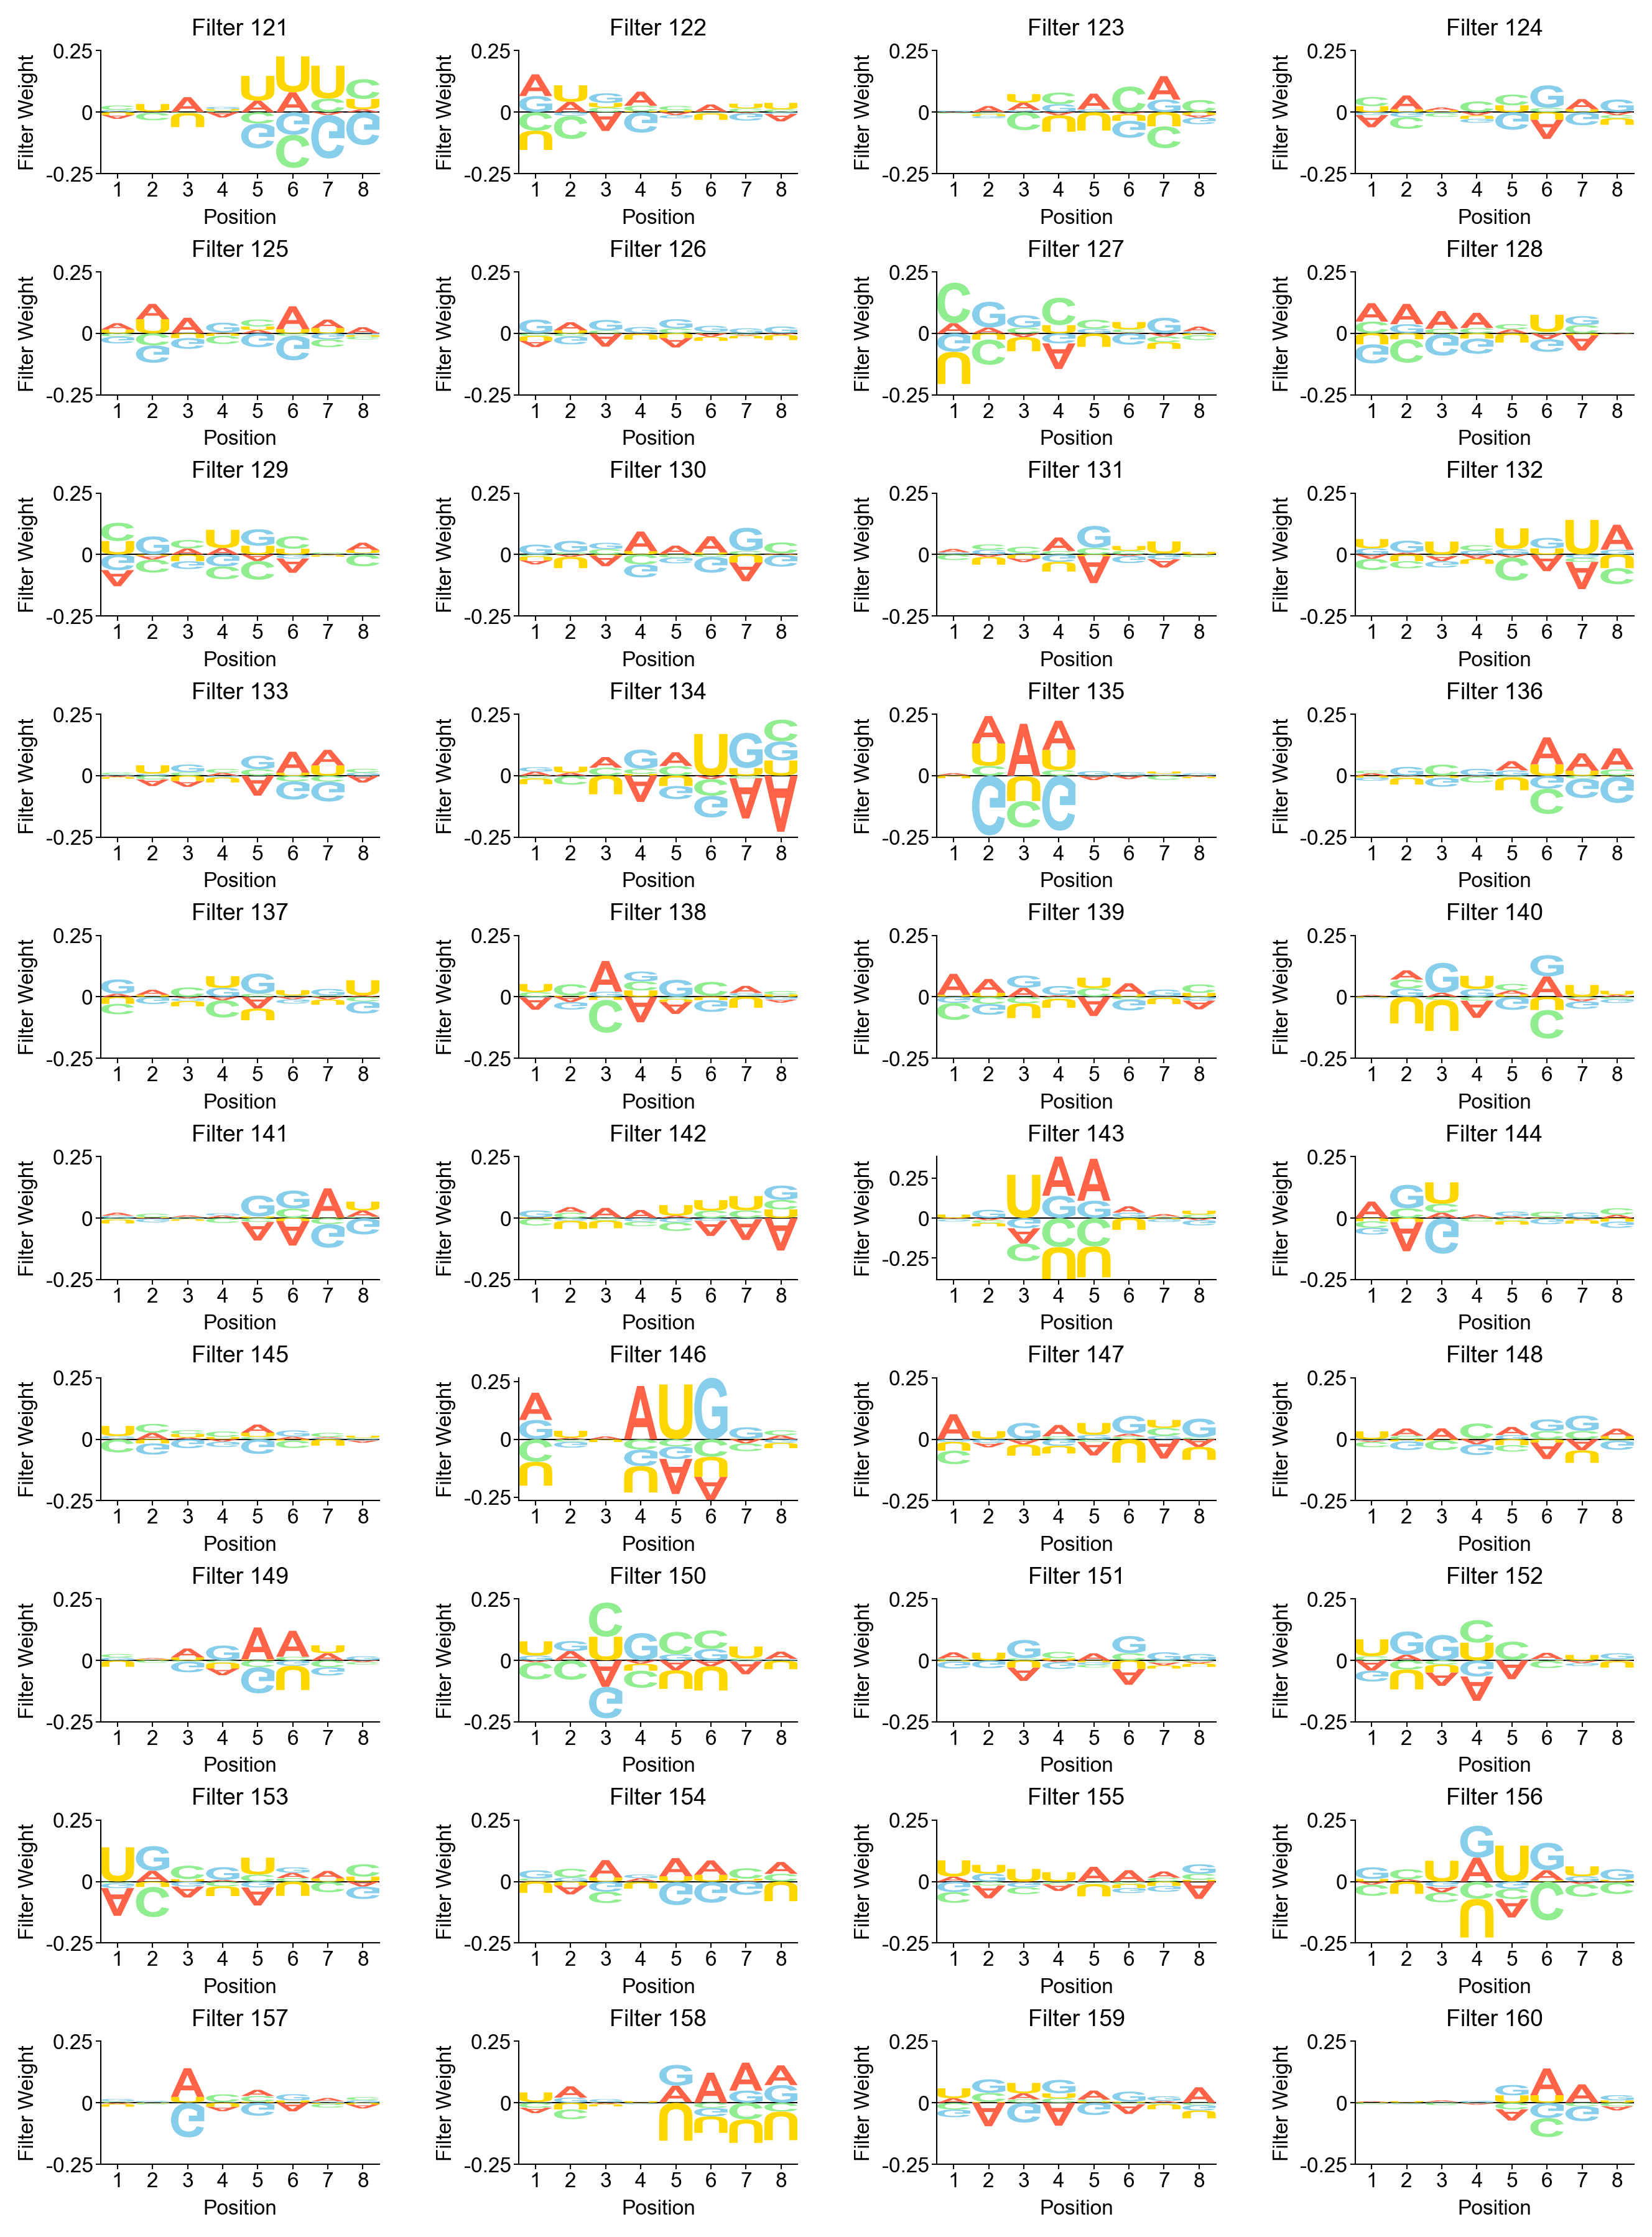

In [12]:
fig4 = draw_filter_logo(120, 160)
fig4.savefig('../figs/filterLogo4.png',dpi=300)